In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
%autosave 30

Autosaving every 30 seconds


In [4]:
## Loading the MNIST dataset

mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist["data"], mnist["target"]

# features
X.shape

(70000, 784)

In [7]:
# label
y.shape

(70000,)

#### There are 70,000 images and each image has 784 features. This is because each image is 28 x 28 pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's visualize a one digit from the dataset.

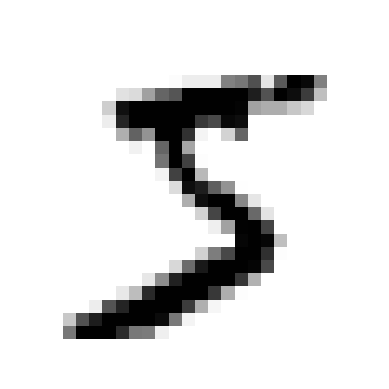

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

=> Looks kinda like 5 and that indeed label val tells.

In [10]:
y.unique()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
## since, label column has string vals, lets typecast

y = y.astype(np.uint8)
y.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

#### test_train_split:

But the thing is MNIST dataset is actually already split into a training set and test set already (the last 10,00 images).
The training set is already shuffled for us, which is good beacuse this gurantees that all cross-validation folds will be similar as we don't want one fold to be missing some digits.

**Moreover, some learning algos are sensitive to the order of the training instances, and they perform poorly if they get similar instances in a row, Shuffling ensures this won't happen.**

In [12]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_train, x_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y[:60000], y[60000:]

In [14]:
## training features

x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## training labels

y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

### # Training a Binary Classifier:

for 5 and not_5

In [16]:
## Target vectors

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD (Stochastic Gradient Descent) classifer: 

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

#### => This classifier relies on randomness during training and hence the name `Stochastic`.

In [18]:
## prediction for some_image

sgd_clf.predict(some_digit.reshape(1, -1))

array([ True])

### # Implementing Cross-Validation:

In [19]:
## Let's compute accuaracy using cross_val-score() cross-validation:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, x_train, y_train_5, cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.950) total time=   8.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV] END ................................ score: (test=0.960) total time=   7.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


[CV] END ................................ score: (test=0.960) total time=   6.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.2s finished


In [20]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Average Score: ", scores.mean())
    print("Standard error: ", scores.std())

In [21]:
display_scores(scores)

Scores:  [0.95035 0.96035 0.9604 ]
Average Score:  0.9570333333333334
Standard error:  0.004725874404688398


=> pretty amazing, huh!

### # Cross-validation using Stratified Sampling:

This cross-validation object is a variation of KFold that returns
stratified folds. **The folds are made by preserving the percentage of
samples for each class.**

#### => Implies that each class is gonna have right proportion of true and false entries in the label column.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    # data segregation for cross-validation
    x_train_fold = x_train.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_train_fold = y_train_5.iloc[train_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_fold, y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold) # number of correct predictions
    print(n_correct/len(y_pred))   

0.9669
0.91625
0.96785


#### # Before getting much excited, let's look at a very dumb classifier that just classifies every single image in the `not-5` class:

In [23]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):pass
    
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [24]:
## Let's compute its accuracy

never5clf = Never5Classifier()
cross_val_score(never5clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

#### => Man, seriously! over 90% for the dumb one?

In [25]:
y_train_5.value_counts()[1] / (y_train_5.value_counts()[0] + y_train_5.value_counts()[1])

0.09035

#### => That's because only 10% of images reperesent the digit 5, thus even with that dumb classier we are right 90% of the time.

Demonstrating **`Accuracy ain't the reliable metric for the classfication`** especially when dealing with **skewed datasets**.

### # Confusion Matrix 
#### -- A much better way to evaluate the performance of a classifier. 

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

=> These are some clean predictions because these predicitons are made by a model that never saw the data during training.

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

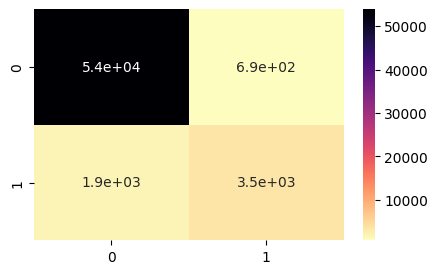

In [28]:
## A better visualozation of confusion matrix

import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_train_5, y_train_pred), annot=True, cmap="magma_r")
plt.show()

In binary classification, the count of <br>**true negatives** is
:math:`C_{0,0}`, <br>**false negatives** is :math:`C_{1,0}`, <br>**true positives** is
:math:`C_{1,1}` and <br>**false positives** is :math:`C_{0,1}`.

### # If the classifier would've been 100% accurate:

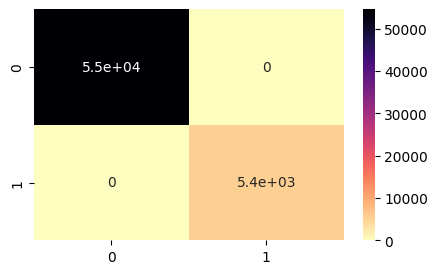

In [29]:
y_train_perfect_preds = y_train_5  # pretending our clf is 100% accurate

# plotting Confusion Matrix

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_train_5, y_train_perfect_preds), annot=True, cmap="magma_r")
plt.show()

### # Precision and Recall:

**Precision:** Out of **positive predicitons** made by the classsifier, how many are correctly classified.

**Recall:** Out of actual total **positive instances**, how many are correctly classified. In other words, how much `sensitive` the classifier is in giving positive predictions.

In [30]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall (sensitivity): ", recall_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall (sensitivity):  0.6511713705958311


=> Now our 5-detector classifier doesn't look as shiny as it did when we computed it's accuracy, does it?!

**When it claims an image represents a 5, it is correct only `76.3%` of the time. Moreover, it only detects `76%` of the 5s.**

### # F1 Score:

-- The **harmonic mean** of `Precision` and `Recall`. Can be used when we can't choose one from the precision and recall.

#### Where the regular mean treats all values equally, the hormic mean gives much more weight to low vals. And as a<br><br>result, `F1 Score` is only gonna be high if both `Precision` and `Recall` are high.

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

- The `F1 score` favors classifiers that have similar precision and recall. Thi si not always what we'd want.
<br><br>
- Sometimes we'd care more about the precision and sometimes about the recall. Unfortunately, we can't have it both ways. This is called **`Precision/Recall Trade-off`**. 
<br><br>
- Say, we trained a classifier to recognize shoplifters, we'd probably be fine even if the classifier has only 30% precision (for sure the guard's gonna get few false alarms) as long as it has 99% recall (implying almost all shoplifters are gonna get caught).

    => because by having 99% recall, it's damn sure that out of all actual shoplifters, our classifier's gonna predict 99% of them.

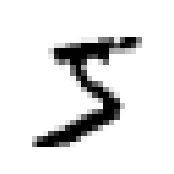

In [92]:
## some_digit_image

plt.figure(figsize = (2,2))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

### # Precision/Recall Trade-off: 

SGDClassifier() estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate)

For each instance, it computes a score based on a `decision function`. If that score is greater than the threshold, it assigns the instance to the positive class otherwise assigns it to the negative class.

In [35]:
## Decision function of the Classifier
# to predict confidence scores for samples.

y_score_score_for_some_digit = sgd_clf.decision_function([some_digit])
y_score_score_for_some_digit

array([2164.22030239])

In [39]:
## Since scikit learn doesn't directly let's to set a threshold, 
# we're gonna do it through a long way
# Say, threshold = 0

thresh = 0
y_some_digit_pred = (y_score_score_for_some_digit > thresh)
y_some_digit_pred

array([ True])

In [40]:
# Say, thresh = 3000

thresh = 3000
y_some_digit_pred = y_score_score_for_some_digit > thresh
y_some_digit_pred

array([False])

=> This confirms increasing threshold decreases recall. The image actually represents a 5, and the classifier detetcts it when the threshold is 0 and misses it, when it's raised to 3000.

### # How to decide which threshold to use?

In [41]:
## Firstly, find scores for all the instances

y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [42]:
## Secondly, compute precision and recall for all possible thresholds

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

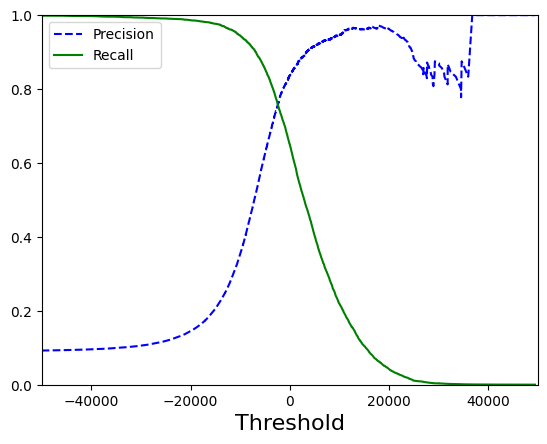

In [76]:
## plot the Precison-Recall vs Thresholds

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold", fontsize=16)
    plt.legend()
    plt.axis([-50000, 50000, 0, 1])
    
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

=> Although, it's expected for the precision to go up with increase in thresholds but it may sometimes go down too like shown in above plot.

### # Precision vs Recall:

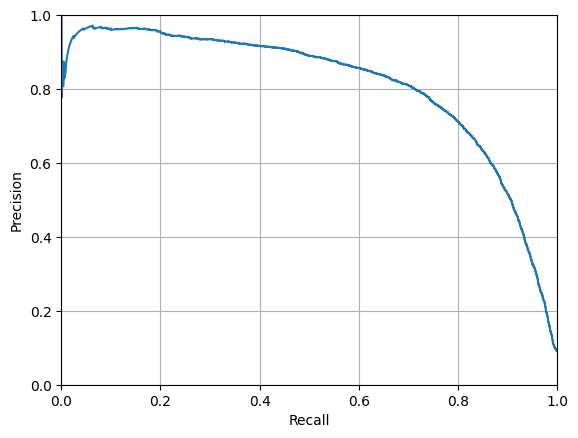

In [81]:
## Another way to select good precision/recall trade-off

plt.plot(recalls, precisions)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

=> As we can, the precision really starts to fall sharply around 80% recall. We'd probably want to select a precision/recall trade-off just before that drop say, at 60% recall.

In [98]:
## Say we want 90% precision

thresh_for_90_precision = thresholds[np.argmax(precisions >= 0.90)]
thresh_for_90_precision

3370.019499143957

In [100]:
## Predicitons made by our 90% precise classifier

y_train_pred_90 = (y_scores >= thresh_for_90_precision)

In [101]:
## Let's compute this very's classifier's precision and recall

print("Precision: ", precision_score(y_train_5, y_train_pred_90))
print("Recall: ", recall_score(y_train_5, y_train_pred_90))

Precision:  0.9000345901072293
Recall:  0.4799852425751706


### If someone says, "Let's reach 99% precision", we oughta ask, "At what recall?".